# 第6章 k平均法：教師なし学習モデルの基礎

## 「06-k_means.py」の解説

ITエンジニアための機械学習理論入門「第6章 k平均法:教師なし学習モデルの基礎」で使用しているサンプルコード「06-k_means.py」の解説です。

※ 解説用にコードの内容は少し変更しています。

はじめに必要なモジュールをインポートしておきます。

特に、画像データを扱うためにPILモジュールを利用します。

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from PIL import Image

import matplotlib
matplotlib.rcParams['font.size'] = 12

画像ファイル「photo.jpg」をダウンドードします。

In [2]:
!curl -OL https://github.com/enakai00/jupyter_ml4se/raw/master/photo.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   139  100   139    0     0   2438      0 --:--:-- --:--:-- --:--:--  2438
100 47187  100 47187    0     0   286k      0 --:--:-- --:--:-- --:--:--  286k


画像ファイル「photo.jpg」を読み込みます。

In [0]:
im = Image.open("photo.jpg")    

画像を表示してみます。白、赤、緑の３色を中心に構成された画像です。

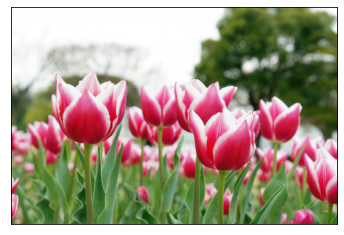

In [4]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

画像データを各ピクセルの (R,G,B) を並べたリストに変換します。

In [0]:
pixels = list(im.convert('RGB').getdata())    

リストの先頭部分を確認すると、次のようになります。

In [6]:
pixels[:10]

[(251, 253, 252),
 (250, 252, 251),
 (250, 252, 251),
 (250, 252, 251),
 (251, 253, 252),
 (252, 254, 253),
 (253, 255, 254),
 (255, 255, 255),
 (254, 254, 254),
 (254, 254, 254)]

このリストから、k平均法で「代表色」を決定する関数を用意します。

k個の代表色を決定して、各ピクセルを代表色に置き換えたリストを返します。

In [0]:
def run_kmeans(pixels, k):
    cls = [0] * len(pixels)

    # 代表色の初期値をランダムに設定
    center = []
    for i in range(k):
        center.append(np.array([randint(256), randint(256), randint(256)]))
    print("Initial centers:", end='')
    print(list(map(lambda x: x.tolist(), center)))
    print("========================")
    distortion = 0.0

    # 最大50回のIterationを実施
    for iter_num in range(50): 
        center_new = []
        for i in range(k):
            center_new.append(np.array([0,0,0]))
        num_points = [0] * k
        distortion_new = 0.0

        # E Phase: 各データが属するグループ（代表色）を計算
        for pix, point in enumerate(pixels):
            min_dist = 256*256*3
            point = np.array(point)
            for i in range(k):
                d = sum([x*x for x in point-center[i]])
                if d < min_dist:
                    min_dist = d
                    cls[pix] = i
            center_new[cls[pix]] += point
            num_points[cls[pix]] += 1
            distortion_new += min_dist

        # M Phase: 新しい代表色を計算
        for i in range(k):
            if num_points[i] == 0:
                center_new[i] = np.array([0,0,0])
            else:
                center_new[i] = center_new[i] / num_points[i]
        center = center_new
        print(list(map(lambda x: x.tolist(), center)))
        print("Distortion: J=%d" % distortion_new)

        # Distortion(J)の変化が0.1%未満になったら終了
        if iter_num > 0 and distortion - distortion_new < distortion * 0.001:
            break
        distortion = distortion_new
        
    # 画像データの各ピクセルを代表色で置き換え
    new_pixels = []
    for pix in range(len(pixels)):
        new_pixels.append(tuple(center[cls[pix]]))

    print("Done.")
    return list(map(lambda x: (int(x[0]), int(x[1]), int(x[2])), new_pixels))

例として、2つのクラスターに分類します。

In [8]:
result = run_kmeans(pixels, 2)

Initial centers:[[51, 83, 183], [191, 232, 239]]
[[109.84079516974253, 94.92144186223133, 61.252515759094706], [231.61101576745682, 214.74706371339698, 218.17582859594552]]
Distortion: J=3036800235
[[112.02661292548933, 96.3685135595248, 63.30019600806118], [233.97350212628595, 218.14528918892367, 222.39339798739667]]
Distortion: J=904260258
[[112.86703169556226, 96.71894900831792, 64.0754079243461], [234.56022920022235, 219.49595906324387, 223.6613880297048]]
Distortion: J=899328680
[[113.15847778514288, 96.82775654005756, 64.34179008253956], [234.73851929331863, 219.96813342694617, 224.0779470132252]]
Distortion: J=898765956
Done.


結果を画像として表示します。

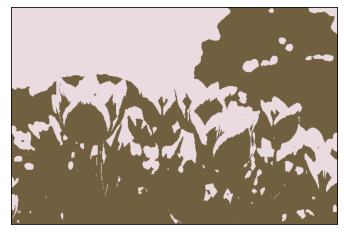

In [9]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

同様に3つのクラスターに分類します。

In [10]:
result = run_kmeans(pixels, 3)

Initial centers:[[132, 231, 100], [231, 78, 206], [129, 81, 11]]
[[148.54905503559425, 166.4918512629639, 130.3409460484949], [237.89652998653256, 204.8767299922634, 216.00693429611164], [98.59629589200597, 86.21117296753144, 49.00901163143276]]
Distortion: J=2406995957
[[163.38226272894576, 136.5199661145678, 120.01659217713902], [239.08240882427953, 227.52907421576128, 231.50942042846214], [99.4867692975371, 85.20196260442913, 49.33054453834191]]
Distortion: J=747373056
[[171.65845839334665, 126.67427867862287, 119.11562049900107], [239.5888827553905, 231.9429082818956, 234.40758769508707], [92.51933379165423, 86.86573359448977, 46.48865655766412]]
Distortion: J=626982884
[[176.01743387532676, 119.93894820787736, 117.25601435470294], [239.60235583566444, 232.56846752721512, 234.78719962252705], [88.55724057479188, 90.1423458295774, 46.37849302720187]]
Distortion: J=606082524
[[178.62372300459168, 114.42120526396731, 114.98615901750995], [239.38161471091573, 232.36889701687863, 234.53

結果を画像として表示します。

「白、赤、緑」が抽出されていることがわかります。

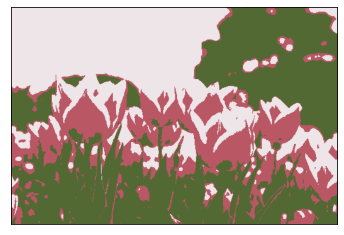

In [11]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

最後に、8つのクラスターに分類して、結果を画像として表示してみます。

In [12]:
result = run_kmeans(pixels, 8)

Initial centers:[[40, 61, 84], [173, 210, 47], [72, 226, 75], [209, 205, 19], [254, 128, 120], [147, 52, 98], [246, 114, 217], [38, 117, 82]]
[[44.497262773722625, 67.22205147906261, 27.12826546292739], [141.06741573033707, 158.2030259205696, 97.53520970074536], [120.34176029962546, 161.25187265917603, 109.19616104868913], [0, 0, 0], [207.1907635009311, 121.94227188081936, 142.91813780260708], [171.28576225654803, 52.85307066636818, 68.37206178643385], [238.3106403956554, 227.82861822750186, 231.52429114387036], [89.94282338779786, 121.90537437863624, 61.06615991618555]]
Distortion: J=1523771555
[[46.378767355231965, 71.57661699966137, 27.16775313240772], [144.6716375648891, 150.993487494101, 98.76413402548371], [120.61635560364259, 151.8020917861329, 110.74177260842124], [12.659203980099502, 34.30099502487562, 9.681592039800995], [214.07000450551925, 127.47730344672223, 153.51244649695877], [181.16486045842524, 33.00585019660497, 60.54056775678527], [239.99904291233076, 234.7869000800

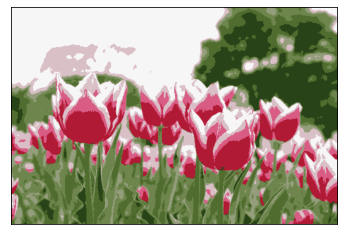

In [13]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

インターネットから好きな画像をダウンロードして試すこともできます。ここでは、無償利用可能なフリー素材をダウンロードしてみます。

In [14]:
!curl -OL http://2.bp.blogspot.com/-4SSFZUa0ab4/Vg57ivCMfhI/AAAAAAAAyzQ/Pm4eBFxAaOc/s800/sweets_fruit_pafe.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  308k  100  308k    0     0  16.7M      0 --:--:-- --:--:-- --:--:-- 16.7M


ダウンロードしたファイルを確認します。

In [15]:
!ls *.png

sweets_fruit_pafe.png


ファイルを読み込んで表示します。

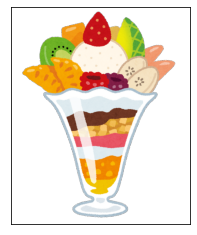

In [16]:
im = Image.open("sweets_fruit_pafe.png")
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

RBG形式のデータに変換して、5つのクラスターに分類します。背景の透明色部分は、黒色に変換される点に注意してください。

In [17]:
pixels = list(im.convert('RGB').getdata())
result = run_kmeans(pixels, 5)

Initial centers:[[106, 175, 27], [70, 52, 146], [253, 163, 66], [214, 42, 161], [224, 223, 198]]
[[115.66899734302895, 172.92043070899174, 47.03684799328765], [4.3139754556950125, 1.7048497290544045, 1.7463057697614406], [236.64335051887105, 165.9512525613061, 35.5092537510741], [209.2925324515078, 40.705295888653076, 50.79991115937022], [231.7095261358085, 230.9580459208598, 225.58838299951148]]
Distortion: J=10231580470
[[116.36812838741466, 174.9374956007602, 50.641796297599775], [0.33067189527696866, 0.10822029291529589, 0.15800520975713986], [236.72465935526753, 166.86369225656364, 35.31924227318046], [175.16876303840962, 43.15820959626948, 48.57381273775923], [231.82967205397773, 231.1792915424447, 225.9251039541817]]
Distortion: J=608562387
[[116.26809385411498, 175.6647763521656, 50.58722619975899], [0.04817910221986915, 0.016847558900276064, 0.0669112178396299], [236.70256316912946, 166.59369880694322, 35.61125543990866], [172.41763209100435, 42.57003442598413, 47.775542583445

結果を表示して確認します。

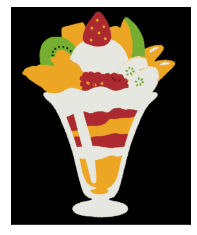

In [18]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)